In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load Dataset
df = pd.read_csv("C:\\Users\\vikas\\Desktop\\Airline_Delay_Cause.csv")

In [3]:
#: Check Data Types & Convert if Needed
print("Before Type Conversion:\n", df.dtypes)


Before Type Conversion:
 year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object


In [4]:

int_cols = ["arr_flights", "arr_del15", "carrier_ct", "weather_ct", "nas_ct",
            "security_ct", "late_aircraft_ct", "arr_cancelled", "arr_diverted"]
for col in int_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # Convert non-numeric values to NaN
    df[col] = df[col].fillna(0).astype(int)  # Fill NaN with 0 and convert to int

In [5]:
print("After Type Conversion:\n", df.dtypes)

After Type Conversion:
 year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights              int64
arr_del15                int64
carrier_ct               int64
weather_ct               int64
nas_ct                   int64
security_ct              int64
late_aircraft_ct         int64
arr_cancelled            int64
arr_diverted             int64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object


In [6]:
negative_delay_cols = ["arr_delay", "carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]

# Rows where any of the delay columns have a negative value
negative_delays = df[df[negative_delay_cols].lt(0).any(axis=1)]
print("Rows with negative delays:\n", negative_delays)


Rows with negative delays:
 Empty DataFrame
Columns: [year, month, carrier, carrier_name, airport, airport_name, arr_flights, arr_del15, carrier_ct, weather_ct, nas_ct, security_ct, late_aircraft_ct, arr_cancelled, arr_diverted, arr_delay, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay]
Index: []

[0 rows x 21 columns]


In [7]:
# Check missing values before handling
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values Before Handling:\n", missing_values)

print("Shape Before Dropping:", df.shape)

Missing Values Before Handling:
 arr_delay              158
carrier_delay          158
weather_delay          158
nas_delay              158
security_delay         158
late_aircraft_delay    158
dtype: int64
Shape Before Dropping: (101315, 21)


In [8]:
# Drop rows with any missing values
df = df.dropna()

# Confirm that missing values are handled
print("Missing Values After Dropping:\n", df.isnull().sum())

df.shape


Missing Values After Dropping:
 year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64


(101157, 21)

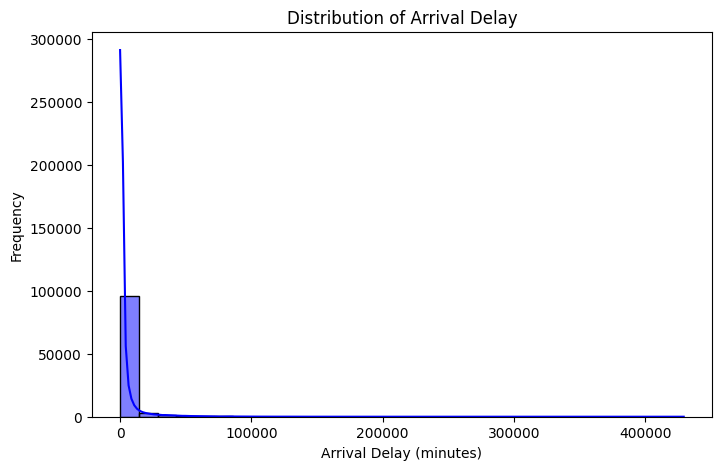

In [9]:
# Step 1: Univariate Analysis
# Distribution of Arrival Delay
plt.figure(figsize=(8, 5))
sns.histplot(df["arr_delay"], bins=30, kde=True, color='blue')
plt.title("Distribution of Arrival Delay")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")
plt.show()


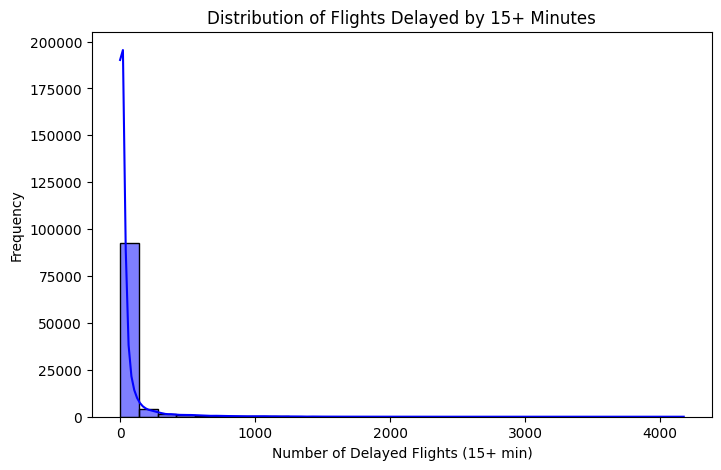

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df["arr_del15"], bins=30, kde=True, color='blue')
plt.title("Distribution of Flights Delayed by 15+ Minutes")
plt.xlabel("Number of Delayed Flights (15+ min)")
plt.ylabel("Frequency")
plt.show()


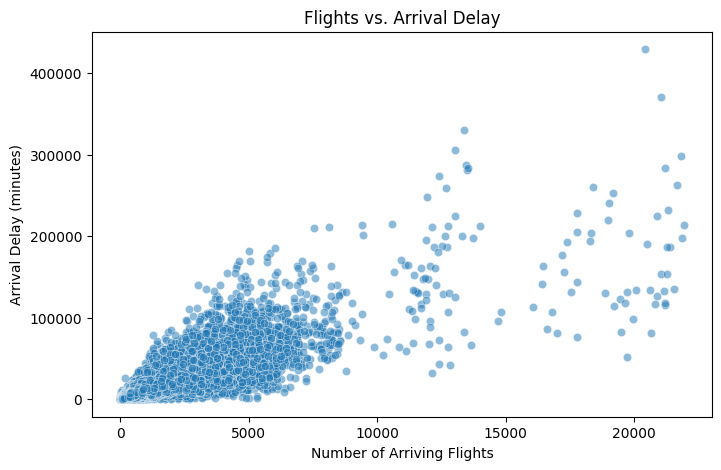

In [11]:
### Step 2: Bivariate Analysis
# Relationship Between Delay and Number of Flights
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["arr_flights"], y=df["arr_delay"], alpha=0.5)
plt.title("Flights vs. Arrival Delay")
plt.xlabel("Number of Arriving Flights")
plt.ylabel("Arrival Delay (minutes)")
plt.show()

In [12]:
df["carrier_ct"].isna().sum()

np.int64(0)

C:\Users\vikas\AppData\Local\Temp\ipykernel_3336\820245136.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="carrier_ct_bin", y="arr_delay", data=df, palette="coolwarm")


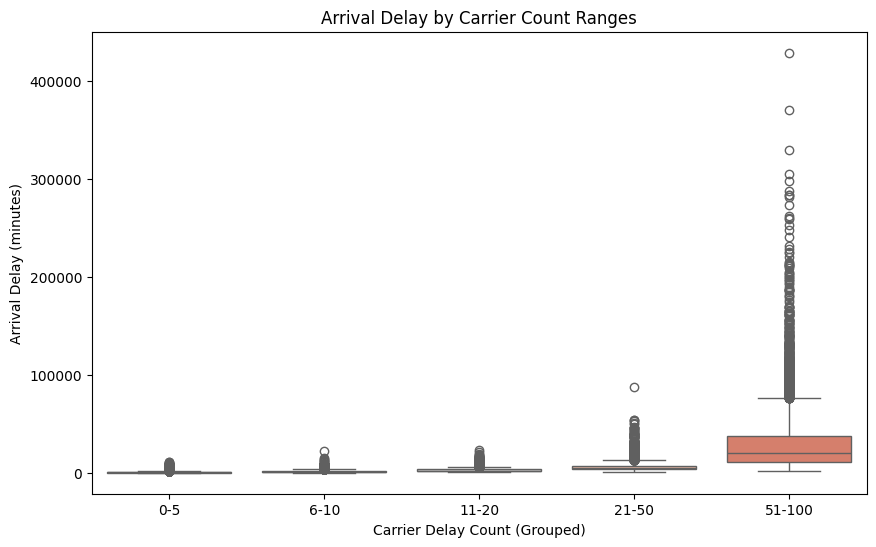

In [13]:

# Binning carrier_ct into meaningful ranges
bins = [0, 5, 10, 20, 50, max(100, df["carrier_ct"].max())]
labels = ["0-5", "6-10", "11-20", "21-50", "51-100"]
df["carrier_ct_bin"] = pd.cut(df["carrier_ct"], bins=bins, labels=labels)

# Boxplot: Arrival delay by carrier-related delay bins
plt.figure(figsize=(10, 6))
sns.boxplot(x="carrier_ct_bin", y="arr_delay", data=df, palette="coolwarm")
plt.title("Arrival Delay by Carrier Count Ranges")
plt.xlabel("Carrier Delay Count (Grouped)")
plt.ylabel("Arrival Delay (minutes)")
plt.show()


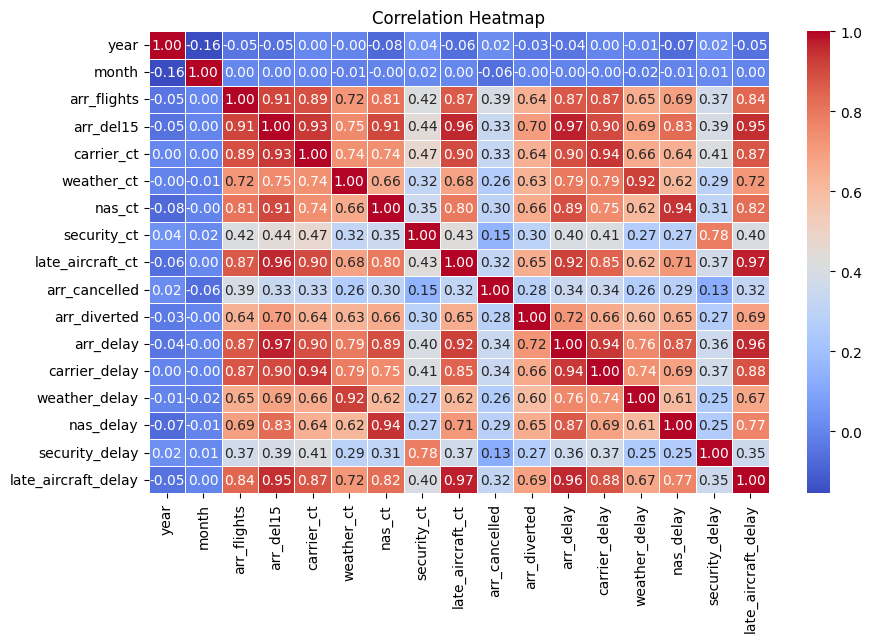

In [14]:
# Step 3: Multivariate Analysis

plt.figure(figsize=(10, 6))

corr_matrix = df.select_dtypes(include=['number']).corr()  # Exclude categorical columns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [15]:
# Check missing values before handling
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values Before Handling:\n", missing_values)

Missing Values Before Handling:
 carrier_ct_bin    14911
dtype: int64


In [16]:
# Define numerical columns with missing values
num_cols = ["arr_flights", "arr_delay", "carrier_ct", "weather_ct", "nas_ct",
            "security_ct", "late_aircraft_ct", "arr_cancelled", "arr_diverted",
            "carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]
df[num_cols].isnull().sum()


arr_flights            0
arr_delay              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [17]:
cat_cols = ["carrier", "carrier_name", "airport", "airport_name"]

# Check missing values in those specific columns
missing_in_cat = df[cat_cols].isnull().sum()
missing_in_cat = missing_in_cat[missing_in_cat > 0]

print("Missing values in categorical columns:\n", missing_in_cat)


Missing values in categorical columns:
 Series([], dtype: int64)


In [18]:
missing_values_after = df.isnull().sum()
missing_values_after = missing_values_after[missing_values_after > 0]
( missing_values_after)


carrier_ct_bin    14911
dtype: int64

In [19]:
# Fill missing values in 'carrier_ct_bin' using the mode (most frequent value)
df['carrier_ct_bin'] = df['carrier_ct_bin'].fillna(df['carrier_ct_bin'].mode()[0])

print("Missing values in 'carrier_ct_bin' handled using mode.")


Missing values in 'carrier_ct_bin' handled using mode.


In [20]:
# Check missing values after handling
missing_values_after = df.isnull().sum()
missing_values_after = missing_values_after[missing_values_after > 0]

# Print missing values
if missing_values_after.empty:
    print("No missing values remaining.")
else:
    print("Missing values remaining:\n", missing_values_after)


No missing values remaining.


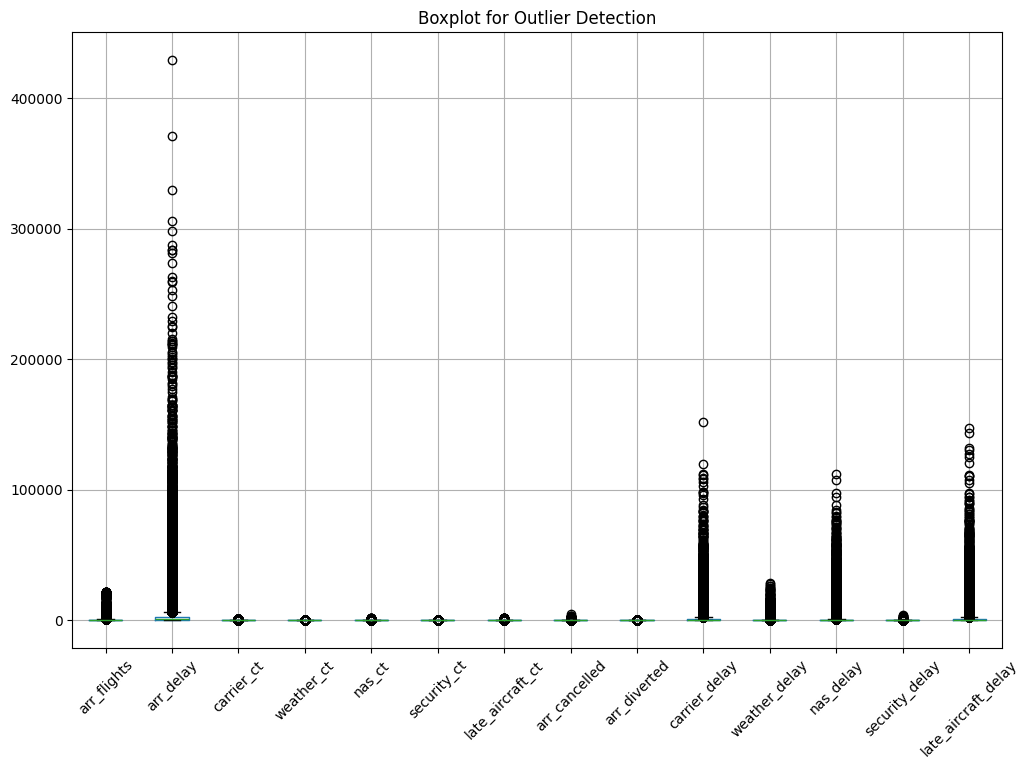

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define numerical columns for outlier detection
num_cols = ["arr_flights", "arr_delay", "carrier_ct", "weather_ct", "nas_ct",
            "security_ct", "late_aircraft_ct", "arr_cancelled", "arr_diverted",
            "carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]

# Visualize outliers using boxplots
plt.figure(figsize=(12, 8))
df[num_cols].boxplot(rot=45)
plt.title("Boxplot for Outlier Detection")
plt.show()


In [22]:
import numpy as np

# Apply log transformation to highly skewed columns
log_cols = ["arr_delay", "carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]
df[log_cols] = df[log_cols].apply(lambda x: np.log1p(x))  # log1p(x) = log(x+1) to avoid log(0) issues


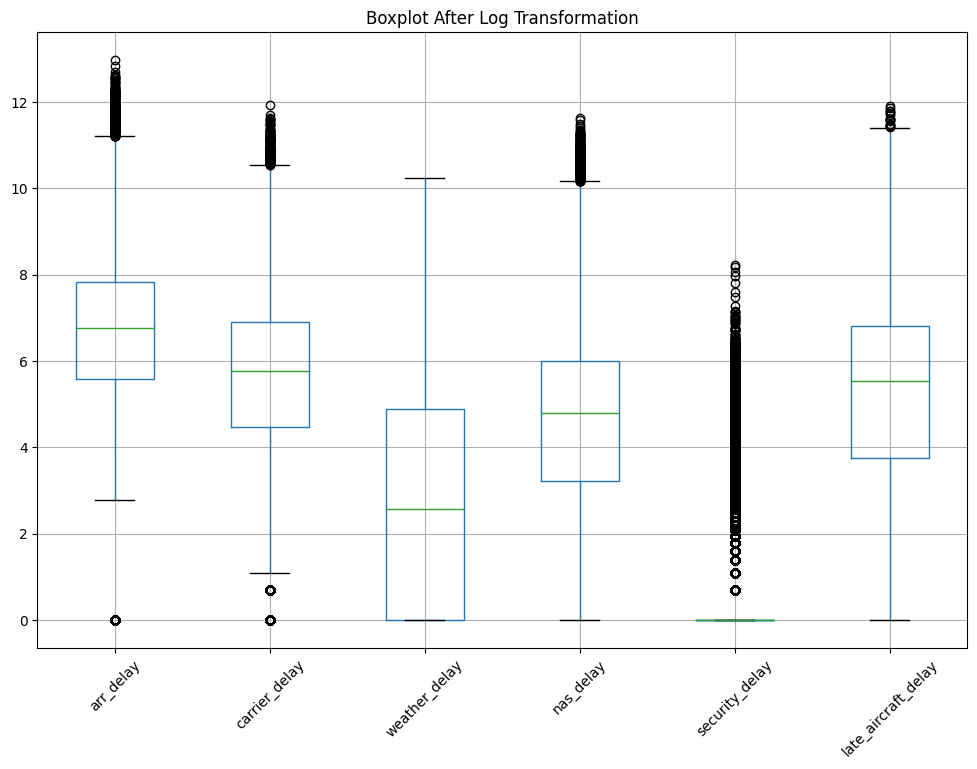

In [23]:
plt.figure(figsize=(12, 8))
df[log_cols].boxplot(rot=45)
plt.title("Boxplot After Log Transformation")
plt.show()


In [24]:
import numpy as np

# List of log-transformed columns to cap outliers
log_cols = ["arr_delay", "carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]

# Function to cap outliers using IQR method
def cap_outliers(df, col, threshold=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply outlier capping to all log-transformed columns
for col in log_cols:
    df = cap_outliers(df, col)

print("Outliers capped successfully!")


Outliers capped successfully!


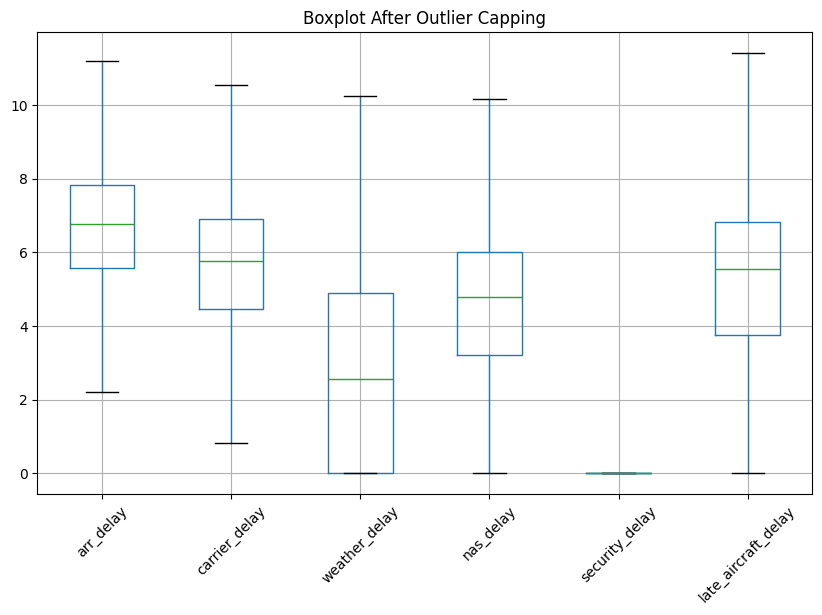

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df[log_cols].boxplot(rot=45)
plt.title("Boxplot After Outlier Capping")
plt.show()



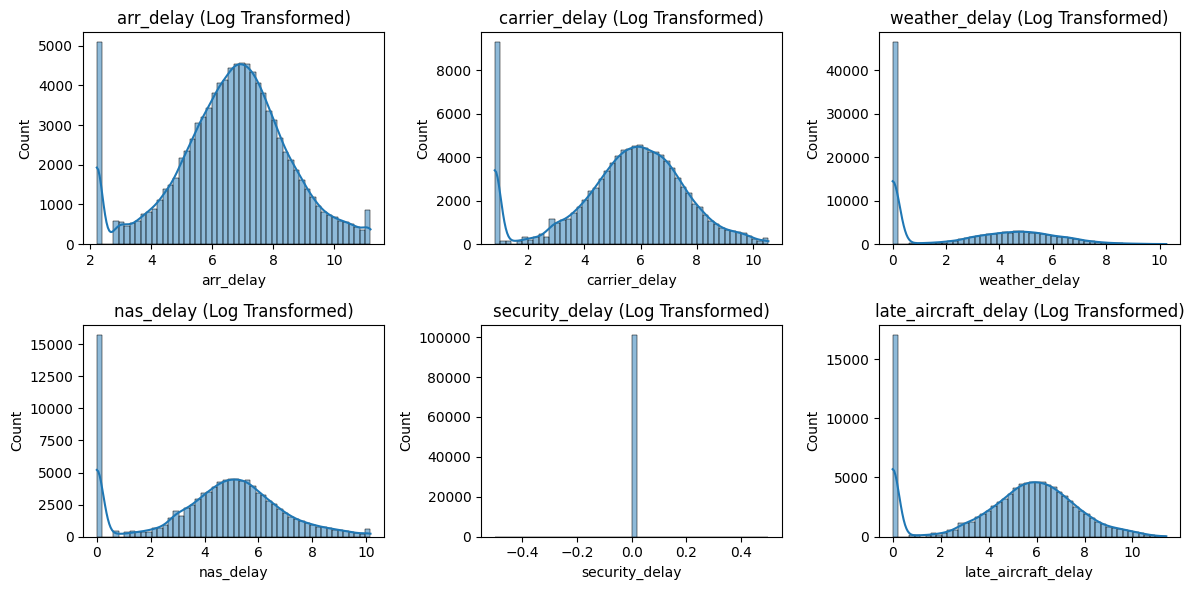

In [26]:
num_cols = ["arr_delay", "carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]

plt.figure(figsize=(12, 6))

for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)  # 2x3 grid since 6 plots
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"{col} (Log Transformed)")

plt.tight_layout()
plt.show()


In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Standardization
std_cols = ["arr_delay", "carrier_delay", "nas_delay", "late_aircraft_delay"]
df[std_cols] = standard_scaler.fit_transform(df[std_cols])

# Normalization
norm_cols = ["weather_delay", "arr_flights", "carrier_ct", "weather_ct", "nas_ct"]
df[norm_cols] = minmax_scaler.fit_transform(df[norm_cols])

# Check summary statistics
print(df.describe())


                year          month    arr_flights      arr_del15  \
count  101157.000000  101157.000000  101157.000000  101157.000000   
mean     2019.515960       6.278626       0.015277      57.960121   
std         1.558815       3.438425       0.042968     163.187970   
min      2017.000000       1.000000       0.000000       0.000000   
25%      2018.000000       3.000000       0.001870       5.000000   
50%      2020.000000       6.000000       0.004058      14.000000   
75%      2021.000000       9.000000       0.010306      39.000000   
max      2022.000000      12.000000       1.000000    4176.000000   

          carrier_ct     weather_ct         nas_ct    security_ct  \
count  101157.000000  101157.000000  101157.000000  101157.000000   
mean        0.015756       0.008095       0.008957       0.111381   
std         0.040992       0.030194       0.030993       0.670126   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000872       0.0000

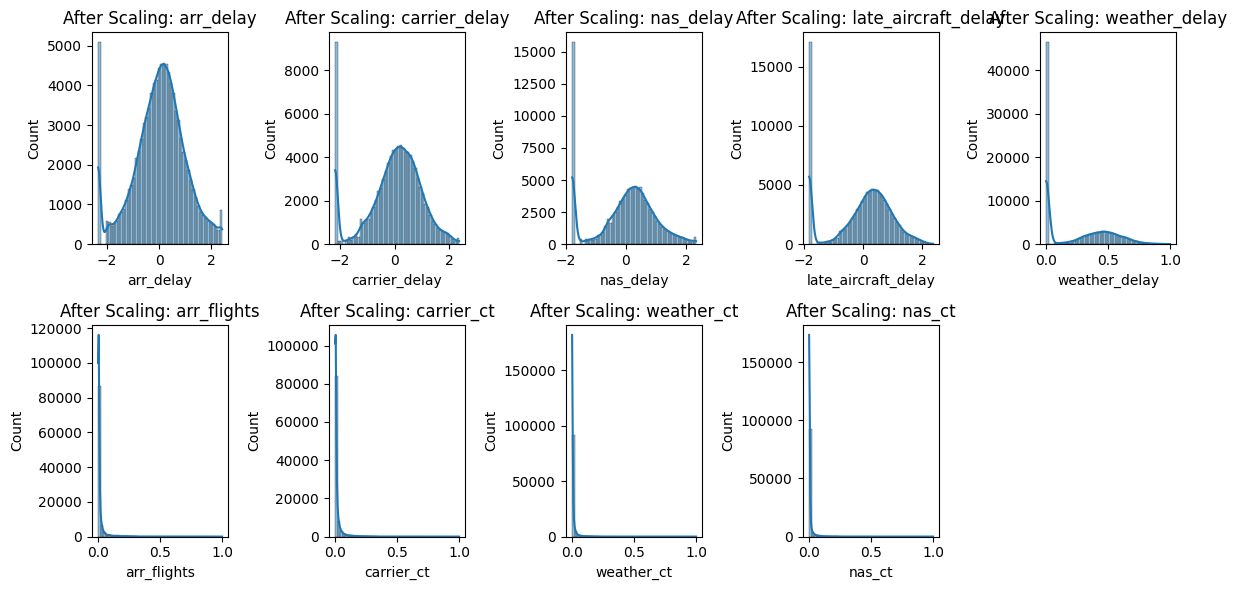

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for i, col in enumerate(std_cols + norm_cols):
    plt.subplot(2, 5, i + 1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"After Scaling: {col}")

plt.tight_layout()
plt.show()


In [29]:
# One-Hot Encoding for 'carrier' and 'airport'
one_hot_cols = ["carrier", "airport"]
df = pd.get_dummies(df, columns=one_hot_cols, prefix=one_hot_cols, drop_first=False)

# Verify the result
print(df.head())
print("Available Columns:", df.columns)


   year  month       carrier_name  \
0  2022      7  Endeavor Air Inc.   
1  2022      7  Endeavor Air Inc.   
2  2022      7  Endeavor Air Inc.   
3  2022      7  Endeavor Air Inc.   
4  2022      7  Endeavor Air Inc.   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...     0.001459          2   
1             Albany, GA: Southwest Georgia Regional     0.003511         25   
2                  Nantucket, MA: Nantucket Memorial     0.005609         19   
3           Alexandria, LA: Alexandria International     0.003010         10   
4        Augusta, GA: Augusta Regional at Bush Field     0.007889         30   

   carrier_ct  weather_ct    nas_ct  security_ct  ...  airport_VLD  \
0    0.000000    0.004425  0.000000            0  ...        False   
1    0.009590    0.000000  0.002654            0  ...        False   
2    0.004359    0.004425  0.003185            0  ...        False   
3    0.000872   

In [30]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding for 'carrier_name' and 'airport_name'
df = pd.get_dummies(df, columns=["carrier_name", "airport_name"], drop_first=False)

# Label Encoding for 'carrier_ct_bin'
label_cols = ["carrier_ct_bin"]
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # store encoders for inverse_transform if needed

# Verify the result
print(df.head())
print("Available Columns:", df.columns)


   year  month  arr_flights  arr_del15  carrier_ct  weather_ct    nas_ct  \
0  2022      7     0.001459          2    0.000000    0.004425  0.000000   
1  2022      7     0.003511         25    0.009590    0.000000  0.002654   
2  2022      7     0.005609         19    0.004359    0.004425  0.003185   
3  2022      7     0.003010         10    0.000872    0.004425  0.001062   
4  2022      7     0.007889         30    0.015693    0.022124  0.001592   

   security_ct  late_aircraft_ct  arr_cancelled  ...  \
0            0                 0              0  ...   
1            0                 7              0  ...   
2            0                 5              5  ...   
3            1                 4              0  ...   
4            0                 2              1  ...   

   airport_name_Williston, ND: Sloulin Field International  \
0                                              False         
1                                              False         
2                   

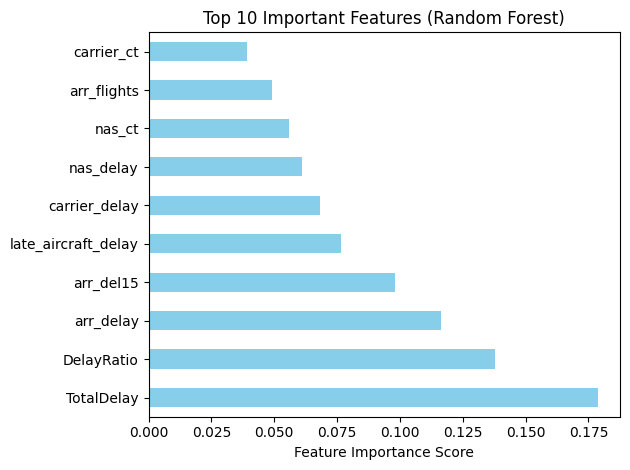


Top 10 Features (Random Forest):
 TotalDelay             0.178633
DelayRatio             0.137958
arr_delay              0.116392
arr_del15              0.098059
late_aircraft_delay    0.076683
carrier_delay          0.068261
nas_delay              0.060872
nas_ct                 0.055994
arr_flights            0.049277
carrier_ct             0.039291
dtype: float64

Top 10 Features (Chi-Square Scores):
 arr_del15              3.578031e+06
late_aircraft_ct       1.323996e+06
arr_cancelled          3.109634e+05
TotalDelay             8.744976e+04
DelayRatio             8.440423e+04
carrier_ct_bin         5.135338e+04
arr_diverted           3.911726e+04
late_aircraft_delay    3.083599e+04
nas_delay              2.890440e+04
arr_delay              2.402691e+04
dtype: float64


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2

# -------- FEATURE ENGINEERING --------

# 1. Total Delay
df['TotalDelay'] = df[['carrier_delay', 'weather_delay', 'nas_delay',
                       'security_delay', 'late_aircraft_delay']].sum(axis=1)

# 2. Delay Ratio
df['DelayRatio'] = df['TotalDelay'] / (df['arr_flights'] + 1)  # Avoid divide-by-zero

# 3. Binary target: Had Delay or Not
df['HadDelay'] = df['TotalDelay'].apply(lambda x: 1 if x > 0 else 0)

# 4. Season from Month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['month'].apply(get_season)

# -------- ENCODING --------

# Label encode Season and carrier_ct_bin
label_cols = ['carrier_ct_bin', 'Season']
for col in label_cols:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Drop columns if present (already one-hot encoded 'carrier_name' and 'airport_name')
df.drop(columns=['year', 'carrier', 'airport', 'carrier_name', 'airport_name'], inplace=True, errors='ignore')

# Drop rows with missing values
df.dropna(inplace=True)

# -------- FEATURE SELECTION --------

# Split features and target
X = df.drop('HadDelay', axis=1)
y = df['HadDelay']

# 1. Random Forest Feature Importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh', title='Top 10 Important Features (Random Forest)', color='skyblue')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.show()

# 2. Chi-Square Feature Selection
X_chi = X.apply(lambda x: x if x.min() >= 0 else x - x.min())
chi_selector = SelectKBest(score_func=chi2, k=10)
chi_selector.fit(X_chi, y)

chi_scores = pd.Series(chi_selector.scores_, index=X.columns)

print("\nTop 10 Features (Random Forest):\n", feat_imp.nlargest(10))
print("\nTop 10 Features (Chi-Square Scores):\n", chi_scores.nlargest(10))


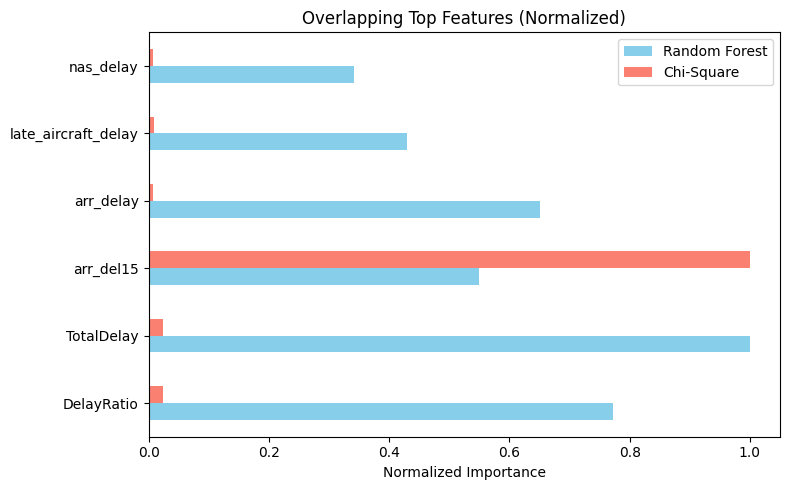

In [32]:
# Normalize both series
rf_norm = feat_imp.nlargest(10) / feat_imp.nlargest(10).max()
chi2_norm = chi_scores.nlargest(10) / chi_scores.nlargest(10).max()

# Find overlapping features
overlap = set(feat_imp.nlargest(10).index) & set(chi_scores.nlargest(10).index)
if overlap:
    overlap_rf = rf_norm[rf_norm.index.isin(overlap)]
    overlap_chi2 = chi2_norm[chi2_norm.index.isin(overlap)]
    overlap_df = pd.DataFrame({
        'Random Forest': overlap_rf,
        'Chi-Square': overlap_chi2
    })
    overlap_df.plot(kind='barh', figsize=(8, 5), color=['skyblue', 'salmon'])
    plt.title('Overlapping Top Features (Normalized)')
    plt.xlabel('Normalized Importance')
    plt.tight_layout()
    plt.show()
else:
    print("No overlapping features in the top 10 of both methods.")


This graph helps us understand which all features are common to both the methods. Although there might be difference in scores of both the tests because Random forest checks non linearity and interactions while chi square tests the statistical independence.


In [49]:
from sklearn.model_selection import train_test_split

X_selected = df[['arr_delay', 'arr_del15', 'late_aircraft_delay', 'nas_delay']]
y = df['HadDelay']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)


In this i performed train test split, where i divided it into 80:20 ratio.
  Why not choose TotalDelay and DelayRatio?
  Because both these columns were only used to derive the HadDelay feature in my dataframe. Including them, will make all evaluation metrics to be abnormally perfect due to data leakage.

Explained variance ratio: [0.73917764 0.15966348]


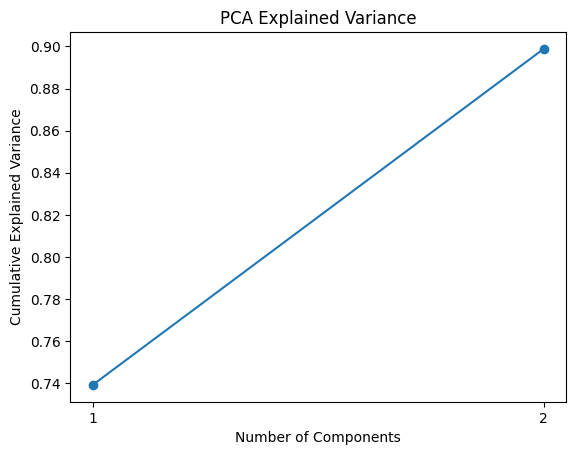

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Scale the features (recommended before PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Fit PCA on training data, then transform both sets
pca = PCA(n_components=2)  # or any number of components you want
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Now X_train_pca and X_test_pca are your PCA-reduced features
print("Explained variance ratio:", pca.explained_variance_ratio_)
plt.plot([1, 2], np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xticks([1, 2])
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

Before applying PCA, i stardardized the data, then applied PCA on training and testing set and reduced the number of columns to only 2 and checked the variance that it captures. The variance capture was approximately 90% which is considerable enough.

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Example: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)
y_pred = rf.predict(X_test_pca)
y_proba = rf.predict_proba(X_test_pca)[:,1]


print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Example: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_pca, y_train)
y_pred_lr = lr.predict(X_test_pca)
y_proba_lr = lr.predict_proba(X_test_pca)[:,1]


print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_lr))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      8608
           1       0.97      0.97      0.97     11624

    accuracy                           0.97     20232
   macro avg       0.97      0.96      0.97     20232
weighted avg       0.97      0.97      0.97     20232

ROC AUC Score: 0.9935719027755036
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      8608
           1       0.97      0.97      0.97     11624

    accuracy                           0.97     20232
   macro avg       0.97      0.97      0.97     20232
weighted avg       0.97      0.97      0.97     20232

ROC AUC Score: 0.9957872520352712


In this cell I trained the pca reduced dataset with 2 Models namely logistic regression and random forest and calculated the performance metrics for both of them.

“Of all the predicted positives, how many were actually correct?”: precision
“Of all the actual positives, how many did we correctly identify?”: recall
For f1, recall and precision, both the models perform good but the roc and auc are slightly better of logistic regression

In [54]:
# ========== With PCA ==========
# Random Forest
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_pca.predict(X_test_pca)
y_proba_rf_pca = rf_pca.predict_proba(X_test_pca)[:, 1]

print("Random Forest (PCA) Classification Report:\n", classification_report(y_test, y_pred_rf_pca))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf_pca))

# Logistic Regression
lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train)
y_pred_lr_pca = lr_pca.predict(X_test_pca)
y_proba_lr_pca = lr_pca.predict_proba(X_test_pca)[:, 1]

print("Logistic Regression (PCA) Classification Report:\n", classification_report(y_test, y_pred_lr_pca))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_lr_pca))


# ========== Without PCA ==========
# Random Forest
rf_orig = RandomForestClassifier(n_estimators=100, random_state=42)
rf_orig.fit(X_train_scaled, y_train)
y_pred_rf_orig = rf_orig.predict(X_test_scaled)
y_proba_rf_orig = rf_orig.predict_proba(X_test_scaled)[:, 1]

print("Random Forest (Original) Classification Report:\n", classification_report(y_test, y_pred_rf_orig))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf_orig))

# Logistic Regression
lr_orig = LogisticRegression(max_iter=1000)
lr_orig.fit(X_train_scaled, y_train)
y_pred_lr_orig = lr_orig.predict(X_test_scaled)
y_proba_lr_orig = lr_orig.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression (Original) Classification Report:\n", classification_report(y_test, y_pred_lr_orig))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_lr_orig))


Random Forest (PCA) Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      8608
           1       0.97      0.97      0.97     11624

    accuracy                           0.97     20232
   macro avg       0.97      0.96      0.97     20232
weighted avg       0.97      0.97      0.97     20232

ROC AUC Score: 0.9935719027755036
Logistic Regression (PCA) Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      8608
           1       0.97      0.97      0.97     11624

    accuracy                           0.97     20232
   macro avg       0.97      0.97      0.97     20232
weighted avg       0.97      0.97      0.97     20232

ROC AUC Score: 0.9957872520352712
Random Forest (Original) Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      8608
           1       0.98   

PCA can help by removing noise and reducing complexity — especially helpful for linear models or when there's multicollinearity.
But it can also hurt if too much useful information is lost in dimensionality reduction.


C:\Users\vikas\AppData\Local\Temp\ipykernel_1336\3243157615.py:60: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Metric', y='Score', hue='PCA', data=metrics_comparison_melted,


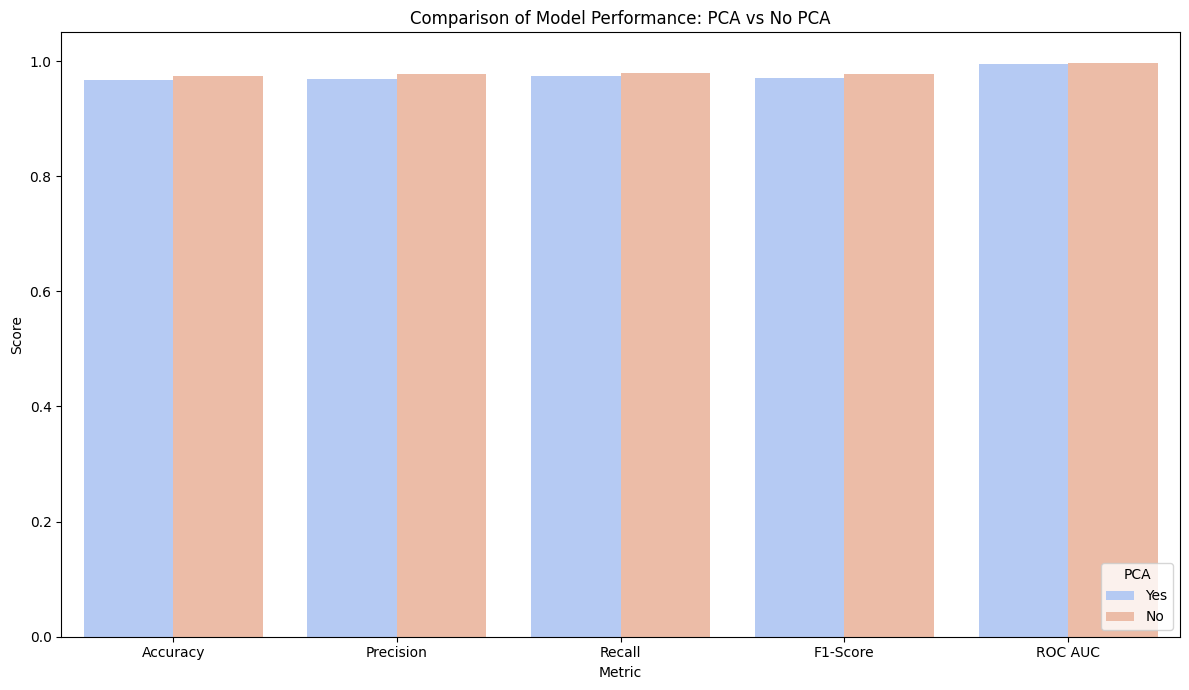

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

# Initialize metrics dictionary for both PCA and non-PCA
metrics_comparison = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC AUC': [],
    'PCA': []  # This will track if the model used PCA or not
}

# Random Forest (With PCA)
metrics_comparison['Model'].append('Random Forest (PCA)')
metrics_comparison['Accuracy'].append(accuracy_score(y_test, y_pred_rf_pca))
metrics_comparison['Precision'].append(precision_score(y_test, y_pred_rf_pca))
metrics_comparison['Recall'].append(recall_score(y_test, y_pred_rf_pca))
metrics_comparison['F1-Score'].append(f1_score(y_test, y_pred_rf_pca))
metrics_comparison['ROC AUC'].append(roc_auc_score(y_test, y_proba_rf_pca))
metrics_comparison['PCA'].append('Yes')

# Random Forest (Without PCA)
metrics_comparison['Model'].append('Random Forest (Orig)')
metrics_comparison['Accuracy'].append(accuracy_score(y_test, y_pred_rf_orig))
metrics_comparison['Precision'].append(precision_score(y_test, y_pred_rf_orig))
metrics_comparison['Recall'].append(recall_score(y_test, y_pred_rf_orig))
metrics_comparison['F1-Score'].append(f1_score(y_test, y_pred_rf_orig))
metrics_comparison['ROC AUC'].append(roc_auc_score(y_test, y_proba_rf_orig))
metrics_comparison['PCA'].append('No')

# Logistic Regression (With PCA)
metrics_comparison['Model'].append('Logistic Regression (PCA)')
metrics_comparison['Accuracy'].append(accuracy_score(y_test, y_pred_lr_pca))
metrics_comparison['Precision'].append(precision_score(y_test, y_pred_lr_pca))
metrics_comparison['Recall'].append(recall_score(y_test, y_pred_lr_pca))
metrics_comparison['F1-Score'].append(f1_score(y_test, y_pred_lr_pca))
metrics_comparison['ROC AUC'].append(roc_auc_score(y_test, y_proba_lr_pca))
metrics_comparison['PCA'].append('Yes')

# Logistic Regression (Without PCA)
metrics_comparison['Model'].append('Logistic Regression (Orig)')
metrics_comparison['Accuracy'].append(accuracy_score(y_test, y_pred_lr_orig))
metrics_comparison['Precision'].append(precision_score(y_test, y_pred_lr_orig))
metrics_comparison['Recall'].append(recall_score(y_test, y_pred_lr_orig))
metrics_comparison['F1-Score'].append(f1_score(y_test, y_pred_lr_orig))
metrics_comparison['ROC AUC'].append(roc_auc_score(y_test, y_proba_lr_orig))
metrics_comparison['PCA'].append('No')

# Create DataFrame for the combined results
metrics_comparison_df = pd.DataFrame(metrics_comparison)

# Barplot for comparison of PCA vs Non-PCA models
plt.figure(figsize=(12, 7))
metrics_comparison_melted = pd.melt(metrics_comparison_df, id_vars=['Model', 'PCA'], 
                                    var_name='Metric', value_name='Score')
sns.barplot(x='Metric', y='Score', hue='PCA', data=metrics_comparison_melted, 
            ci=None, palette='coolwarm')
plt.title("Comparison of Model Performance: PCA vs No PCA")
plt.ylim(0, 1.05)
plt.legend(title="PCA", loc='lower right')
plt.tight_layout()
plt.show()


Random Forest is an ensemble method that typically provides high accuracy by combining the predictions of multiple decision trees. It’s robust to overfitting and works well for a wide range of data types, making it a good choice for exploring complex relationships in the data.

Logistic Regression is a simpler, linear model that is easy to interpret and often serves as a baseline for binary classification problems. While it may not perform as well on complex datasets as more advanced models, it provides a good point of comparison for understanding the impact of non-linear relationships.

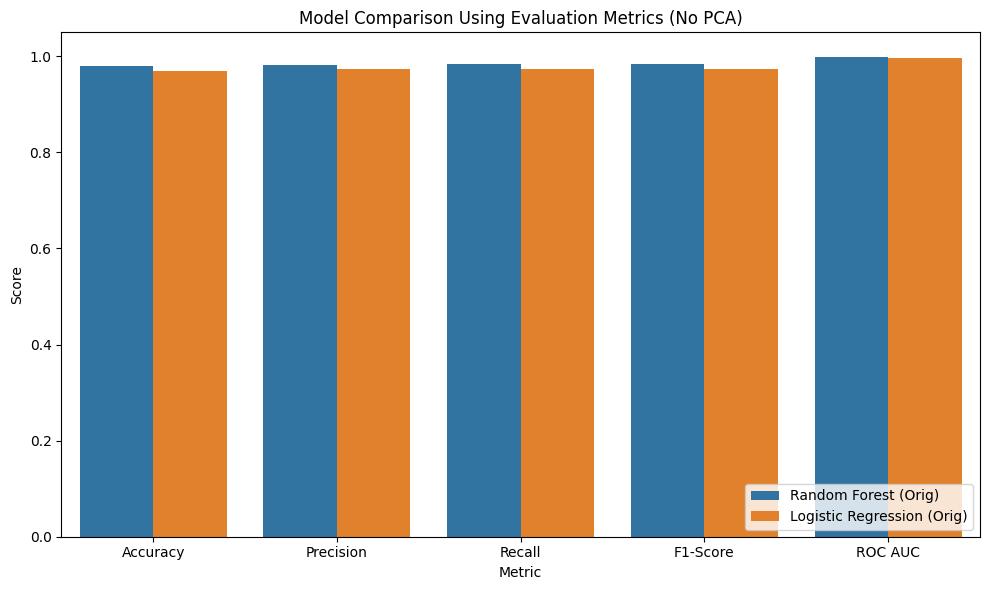

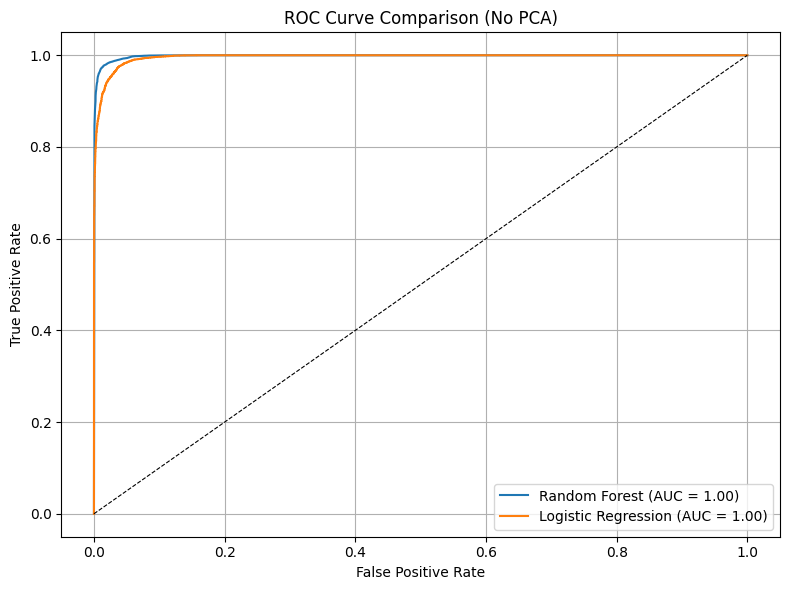

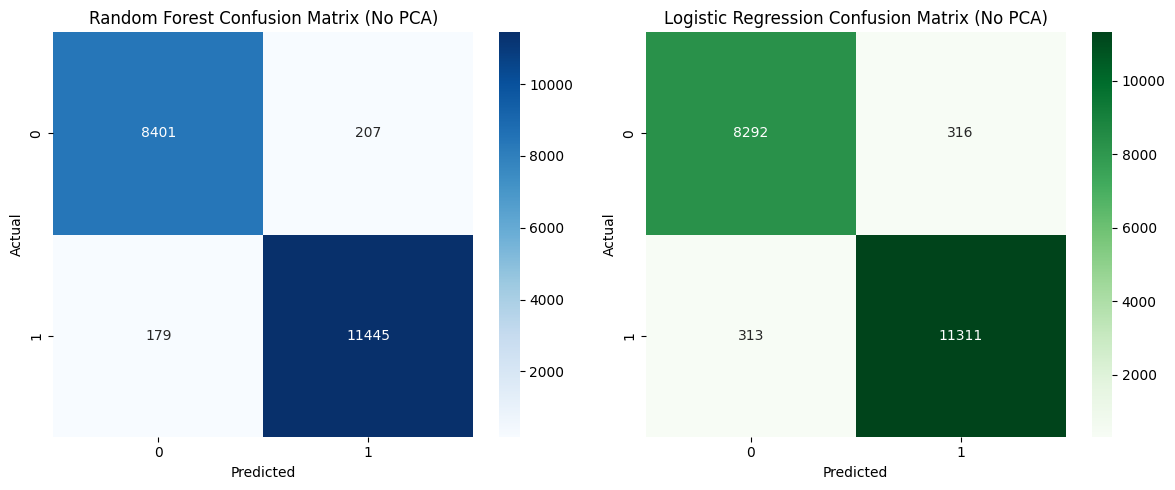

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix, roc_curve, precision_recall_curve,
                             accuracy_score, precision_score, recall_score, f1_score)

# Get metrics for both models without PCA
metrics_no_pca = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC AUC': []
}

# Random Forest (without PCA) Metrics
metrics_no_pca['Model'].append('Random Forest (Orig)')
metrics_no_pca['Accuracy'].append(accuracy_score(y_test, y_pred_rf_orig))
metrics_no_pca['Precision'].append(precision_score(y_test, y_pred_rf_orig))
metrics_no_pca['Recall'].append(recall_score(y_test, y_pred_rf_orig))
metrics_no_pca['F1-Score'].append(f1_score(y_test, y_pred_rf_orig))
metrics_no_pca['ROC AUC'].append(roc_auc_score(y_test, y_proba_rf_orig))

# Logistic Regression (without PCA) Metrics
metrics_no_pca['Model'].append('Logistic Regression (Orig)')
metrics_no_pca['Accuracy'].append(accuracy_score(y_test, y_pred_lr_orig))
metrics_no_pca['Precision'].append(precision_score(y_test, y_pred_lr_orig))
metrics_no_pca['Recall'].append(recall_score(y_test, y_pred_lr_orig))
metrics_no_pca['F1-Score'].append(f1_score(y_test, y_pred_lr_orig))
metrics_no_pca['ROC AUC'].append(roc_auc_score(y_test, y_proba_lr_orig))

# Create DataFrame for non-PCA metrics
import pandas as pd
metrics_no_pca_df = pd.DataFrame(metrics_no_pca)

# Barplot for non-PCA metrics comparison
plt.figure(figsize=(10, 6))
metrics_no_pca_melted = pd.melt(metrics_no_pca_df, id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_no_pca_melted)
plt.title("Model Comparison Using Evaluation Metrics (No PCA)")
plt.ylim(0, 1.05)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Plot ROC Curve for models without PCA
fpr_rf_orig, tpr_rf_orig, _ = roc_curve(y_test, y_proba_rf_orig)
fpr_lr_orig, tpr_lr_orig, _ = roc_curve(y_test, y_proba_lr_orig)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_orig, tpr_rf_orig, label='Random Forest (AUC = {:.2f})'.format(metrics_no_pca['ROC AUC'][0]))
plt.plot(fpr_lr_orig, tpr_lr_orig, label='Logistic Regression (AUC = {:.2f})'.format(metrics_no_pca['ROC AUC'][1]))
plt.plot([0, 1], [0, 1], 'k--', lw=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (No PCA)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Confusion Matrices for models without PCA
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_orig), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Random Forest Confusion Matrix (No PCA)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_lr_orig), annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title('Logistic Regression Confusion Matrix (No PCA)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


Here we compare the two models without dimensionality reduction.
As you can see, Random Forest consistently scores higher across all evaluation metrics.
The ROC curve confirms better discrimination, and the confusion matrix shows fewer misclassifications — making it the better choice in this scenario.”



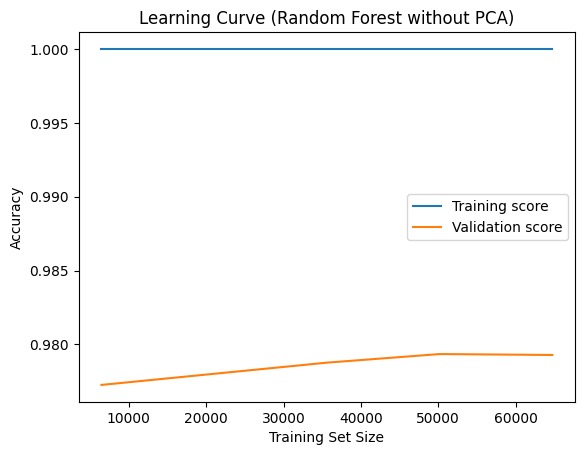

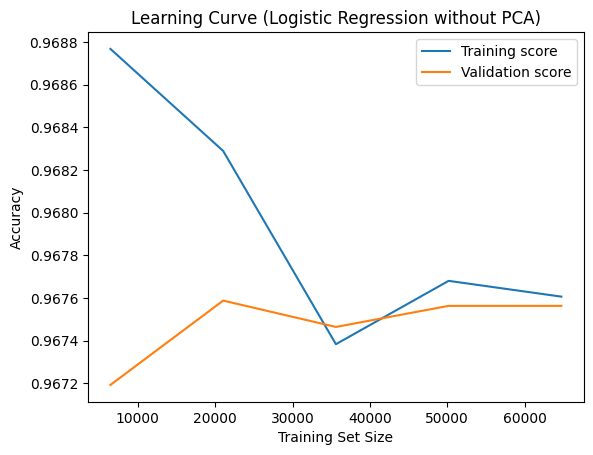

In [57]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Random Forest Learning Curve (Without PCA)
train_sizes_rf_orig, train_scores_rf_orig, val_scores_rf_orig = learning_curve(
    RandomForestClassifier(n_estimators=100, random_state=42),
    X_train_scaled, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean_rf_orig = np.mean(train_scores_rf_orig, axis=1)
val_mean_rf_orig = np.mean(val_scores_rf_orig, axis=1)

plt.plot(train_sizes_rf_orig, train_mean_rf_orig, label='Training score')
plt.plot(train_sizes_rf_orig, val_mean_rf_orig, label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Random Forest without PCA)')
plt.legend()
plt.show()

# Logistic Regression Learning Curve (Without PCA)
train_sizes_lr_orig, train_scores_lr_orig, val_scores_lr_orig = learning_curve(
    LogisticRegression(max_iter=1000, random_state=42),
    X_train_scaled, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean_lr_orig = np.mean(train_scores_lr_orig, axis=1)
val_mean_lr_orig = np.mean(val_scores_lr_orig, axis=1)

plt.plot(train_sizes_lr_orig, train_mean_lr_orig, label='Training score')
plt.plot(train_sizes_lr_orig, val_mean_lr_orig, label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Logistic Regression without PCA)')
plt.legend()
plt.show()


"While both models show very high AUC scores, Random Forest consistently outperforms Logistic Regression in the confusion matrix — making fewer errors overall, particularly in identifying true positives and true negatives. This reinforces our earlier conclusion from the metric scores and learning curves: Random Forest offers superior predictive performance without PCA."

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Set up Randomized Search
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=1,
    scoring='accuracy'  # Consider using 'f1' or 'roc_auc' depending on class imbalance
)

# Fit on scaled training data
rf_random_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters Found:")
print(rf_random_search.best_params_)

# Predict using best estimator on scaled test data
best_rf = rf_random_search.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)
y_proba_best = best_rf.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_best))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   9.9s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   9.8s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   9.5s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   9.9s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   9.7s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   9.7s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  10.1s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time

Improves accuracy and other metrics on unseen data
Balances bias and variance to avoid underfitting or overfitting
Optimizes for pecific goal (e.g., precision, recall, AUC)
Adapts the model to the unique characteristics of your dataset

C:\Users\vikas\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


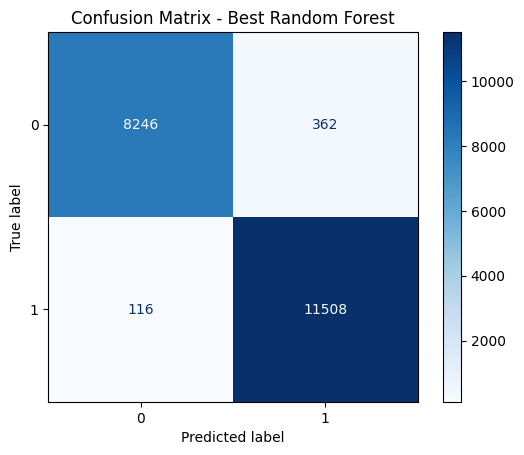

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Best Random Forest")
plt.show()



precision and recall value improved .


C:\Users\vikas\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


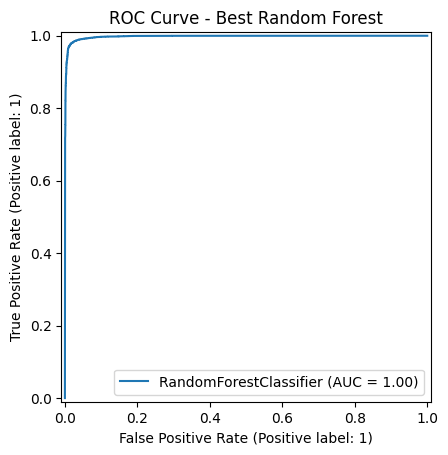

In [72]:
from sklearn.metrics import RocCurveDisplay

# Plot ROC Curve
RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("ROC Curve - Best Random Forest")
plt.show()
